## Index fund - Investing strategies

In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

In [2]:
# Creating basket with 2 index fund - nifty & banknifty
nifty_bees = yf.Ticker("NIFTYBEES.NS")
bank_bees = yf.Ticker("BANKBEES.NS")

In [3]:
# get info
#print(nifty_bees.info)

# get historical market data
days = '450d' #450 days timeframe is considered for analysis
nbees = nifty_bees.history(period=days)
bbees = bank_bees.history(period=days)
nbees.shape, bbees.shape

((449, 7), (449, 7))

In [4]:
nbees.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-15,131.399994,131.449997,130.000000,131.009995,318992,0,0
2020-01-16,131.449997,131.500000,130.000000,130.910004,277915,0,0
2020-01-17,131.449997,131.449997,130.500000,131.190002,394076,0,0
2020-01-20,131.210007,131.500000,129.699997,129.779999,769381,0,0
2020-01-21,130.350006,130.350006,129.050003,129.270004,458654,0,0


In [5]:
nbees.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-10-29,209.000000,209.000000,182.100006,191.160004,3221676,0,0
2021-11-01,208.880005,208.880005,191.360001,193.839996,1708376,0,0
2021-11-02,206.899994,206.899994,183.600006,193.100006,1283566,0,0
2021-11-03,200.000000,200.000000,190.100006,192.580002,955400,0,0
2021-11-04,207.880005,207.880005,185.110001,193.589996,671652,0,0


<AxesSubplot:xlabel='Date'>

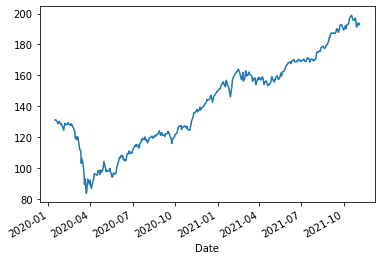

In [6]:
nbees.Close.plot()

<AxesSubplot:xlabel='Date'>

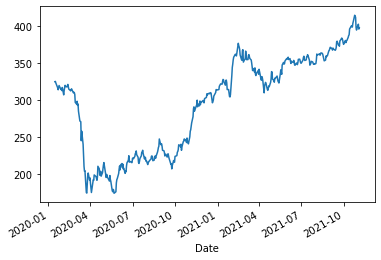

In [7]:
bbees.Close.plot()

In [8]:
# Create basket for analysing investing strategies
basket = nbees.merge(bbees[['Close','Volume']],left_index=True,right_index=True)
basket.shape

(449, 9)

In [9]:
# Drop unwanted columns
basket.drop(['Open','High','Low','Dividends','Stock Splits'],axis=1,inplace=True)
basket.head()

,Close_x,Volume_x,Close_y,Volume_y
Date,,,,
2020-01-15,131.009995,318992,324.799988,89742
2020-01-16,130.910004,277915,325.160004,85986
2020-01-17,131.190002,394076,322.910004,163727
2020-01-20,129.779999,769381,318.000000,171089
2020-01-21,129.270004,458654,316.420013,85599


In [10]:
# Calculate basket price and volume for analysis
basket['price'] = basket['Close_x'] + basket['Close_y']
basket['volume'] = basket['Volume_x'] + basket['Volume_y']
basket.head()

,Close_x,Volume_x,Close_y,Volume_y,price,volume
Date,,,,,,
2020-01-15,131.009995,318992,324.799988,89742,455.809982,408734
2020-01-16,130.910004,277915,325.160004,85986,456.070007,363901
2020-01-17,131.190002,394076,322.910004,163727,454.100006,557803
2020-01-20,129.779999,769381,318.000000,171089,447.779999,940470
2020-01-21,129.270004,458654,316.420013,85599,445.690018,544253


In [11]:
# Creating features for analysis

basket['month'] = basket.reset_index()['Date'].dt.month.values
basket['week_no'] = basket.reset_index()['Date'].dt.isocalendar()['week'].values
basket['weekday'] = basket.reset_index()['Date'].dt.isocalendar()['day'].values
basket['year'] = basket.reset_index()['Date'].dt.year.values
basket['month_yr'] = basket['month'].astype(str) + '_' + basket['year'].astype(str)
basket.drop(['Close_x','Volume_x','Close_y','Volume_y'],axis=1,inplace=True)
basket.head()

,price,volume,month,week_no,weekday,year,month_yr
Date,,,,,,,
2020-01-15,455.809982,408734,1,3,3,2020,1_2020
2020-01-16,456.070007,363901,1,3,4,2020,1_2020
2020-01-17,454.100006,557803,1,3,5,2020,1_2020
2020-01-20,447.779999,940470,1,4,1,2020,1_2020
2020-01-21,445.690018,544253,1,4,2,2020,1_2020


<AxesSubplot:xlabel='Date'>

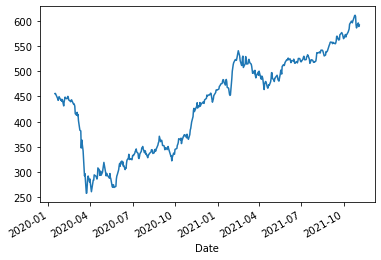

In [12]:
basket.price.plot()

<AxesSubplot:xlabel='price'>

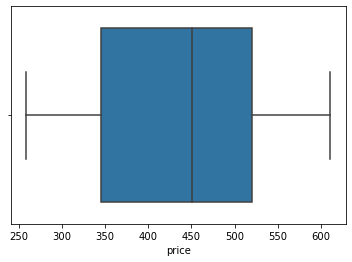

In [13]:
sns.boxplot(x=basket.price)

### Investing strategies

The investing strategies are analysed based on:
1. Buying constant units - weekly
2. Buying constant units - monthly
3. Invest with constant amount - weekly
4. Invest with constant amount - monthly
5. Double invest amount during dips - weekly
6. Double invest amount during dips - monthly

In [14]:
# Create dictionary to append all strategy values for comparison
basket_strat = dict()

### Strategy 1 - Invest constant units every week

In [15]:
basket1 = basket.copy()
n_units = 2

In [16]:
basket1['buy'] = np.where(basket1['week_no'].shift(1).bfill() != basket1['week_no'],1,0)
basket1.head()

,price,volume,month,week_no,weekday,year,month_yr,buy
Date,,,,,,,,
2020-01-15,455.809982,408734,1,3,3,2020,1_2020,0
2020-01-16,456.070007,363901,1,3,4,2020,1_2020,0
2020-01-17,454.100006,557803,1,3,5,2020,1_2020,0
2020-01-20,447.779999,940470,1,4,1,2020,1_2020,1
2020-01-21,445.690018,544253,1,4,2,2020,1_2020,0


In [17]:
basket1['buy_units'] = basket1['buy'] * n_units
basket1['buy_price'] = basket1['buy_units'] * basket1['price']

basket1.head()

,price,volume,month,week_no,weekday,year,month_yr,buy,buy_units,buy_price
Date,,,,,,,,,,
2020-01-15,455.809982,408734,1,3,3,2020,1_2020,0,0,0.000000
2020-01-16,456.070007,363901,1,3,4,2020,1_2020,0,0,0.000000
2020-01-17,454.100006,557803,1,3,5,2020,1_2020,0,0,0.000000
2020-01-20,447.779999,940470,1,4,1,2020,1_2020,1,2,895.559998
2020-01-21,445.690018,544253,1,4,2,2020,1_2020,0,0,0.000000


In [18]:
basket1['invest_units'] = basket1['buy_units'].cumsum()
basket1['invest_price'] = basket1['buy_price'].cumsum()
basket1['MTM'] = basket1['invest_units'] * basket1['price']
basket1['profit_loss'] = basket1['MTM'] - basket1['invest_price']
basket1.tail()

,price,volume,month,week_no,weekday,year,month_yr,buy,buy_units,buy_price,invest_units,invest_price,MTM,profit_loss
Date,,,,,,,,,,,,,,
2021-10-29,585.779999,4113067,10,43,5,2021,10_2021,0,0,0.000000,186,80691.839828,108955.079773,28263.239944
2021-11-01,594.820007,2230170,11,44,1,2021,11_2021,1,2,1189.640015,188,81881.479843,111826.161377,29944.681534
2021-11-02,595.600006,1514556,11,44,2,2021,11_2021,0,0,0.000000,188,81881.479843,111972.801147,30091.321304
2021-11-03,588.530014,1903020,11,44,3,2021,11_2021,0,0,0.000000,188,81881.479843,110643.642639,28762.162796
2021-11-04,591.279999,759731,11,44,4,2021,11_2021,0,0,0.000000,188,81881.479843,111160.639771,29279.159927


<AxesSubplot:xlabel='Date'>

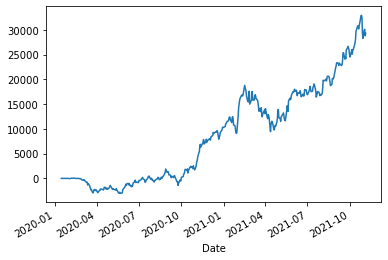

In [19]:
basket1['profit_loss'].plot()

In [20]:
# Final returns
total_invested = round(basket1['invest_price'][-1],2)
net_profit_loss = round(basket1['profit_loss'][-1],2)
units_bought = basket1['invest_units'][-1]
max_mtm = round(basket1['profit_loss'].max(),2)
min_mtm = round(basket1['profit_loss'].min(),2)
avg_mnth_invest = round(basket1.groupby('month_yr')['buy_price'].sum().mean(),2)
abs_returns = round(net_profit_loss/total_invested,2)*100

print(f"Total units invested - {units_bought} units")
print(f"Total amount invested - Rs.{total_invested}")
print(f"Avg monthly investment - Rs.{avg_mnth_invest}")
print(f"Net absolute returns - {abs_returns}%")
print(f"Range of Basket P/L - Rs.{min_mtm} - Rs.{max_mtm}")

Total units invested - 188 units
Total amount invested - Rs.81881.48
Avg monthly investment - Rs.3560.06
Net absolute returns - 36.0%
Range of Basket P/L - Rs.-3011.62 - Rs.32926.26


In [21]:
strat = 'Buy_2units_weekly'
metrics = ['units_invested','total_amount','avg_month_invest','abs_returns','min_pl','max_pl']
values = [units_bought,total_invested,avg_mnth_invest,abs_returns,min_mtm,max_mtm]
basket_strat[strat] = dict(zip(metrics,values))

### Strategy 2 - Invest constant units every month

In [22]:
basket2 = basket.copy()
n_units = 10

In [23]:
basket2['buy'] = np.where(basket2['month'].shift(1).bfill() != basket2['month'],1,0)
basket2.head()

,price,volume,month,week_no,weekday,year,month_yr,buy
Date,,,,,,,,
2020-01-15,455.809982,408734,1,3,3,2020,1_2020,0
2020-01-16,456.070007,363901,1,3,4,2020,1_2020,0
2020-01-17,454.100006,557803,1,3,5,2020,1_2020,0
2020-01-20,447.779999,940470,1,4,1,2020,1_2020,0
2020-01-21,445.690018,544253,1,4,2,2020,1_2020,0


In [24]:
basket2['buy_units'] = basket2['buy'] * n_units
basket2['buy_price'] = basket2['buy_units'] * basket2['price']

basket2.head()

,price,volume,month,week_no,weekday,year,month_yr,buy,buy_units,buy_price
Date,,,,,,,,,,
2020-01-15,455.809982,408734,1,3,3,2020,1_2020,0,0,0.0
2020-01-16,456.070007,363901,1,3,4,2020,1_2020,0,0,0.0
2020-01-17,454.100006,557803,1,3,5,2020,1_2020,0,0,0.0
2020-01-20,447.779999,940470,1,4,1,2020,1_2020,0,0,0.0
2020-01-21,445.690018,544253,1,4,2,2020,1_2020,0,0,0.0


In [25]:
basket2['invest_units'] = basket2['buy_units'].cumsum()
basket2['invest_price'] = basket2['buy_price'].cumsum()
basket2['MTM'] = basket2['invest_units'] * basket2['price']
basket2['profit_loss'] = basket2['MTM'] - basket2['invest_price']
basket2.tail()

,price,volume,month,week_no,weekday,year,month_yr,buy,buy_units,buy_price,invest_units,invest_price,MTM,profit_loss
Date,,,,,,,,,,,,,,
2021-10-29,585.779999,4113067,10,43,5,2021,10_2021,0,0,0.000000,210,90304.299927,123013.799744,32709.499817
2021-11-01,594.820007,2230170,11,44,1,2021,11_2021,1,10,5948.200073,220,96252.500000,130860.401611,34607.901611
2021-11-02,595.600006,1514556,11,44,2,2021,11_2021,0,0,0.000000,220,96252.500000,131032.001343,34779.501343
2021-11-03,588.530014,1903020,11,44,3,2021,11_2021,0,0,0.000000,220,96252.500000,129476.603088,33224.103088
2021-11-04,591.279999,759731,11,44,4,2021,11_2021,0,0,0.000000,220,96252.500000,130081.599731,33829.099731


<AxesSubplot:xlabel='Date'>

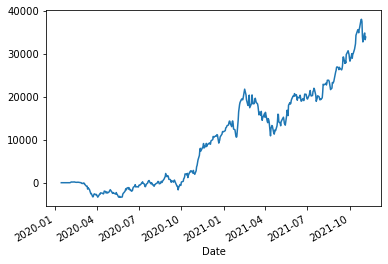

In [26]:
basket2['profit_loss'].plot()

In [27]:
# Final returns
total_invested = round(basket2['invest_price'][-1],2)
net_profit_loss = round(basket2['profit_loss'][-1],2)
units_bought = basket2['invest_units'][-1]
max_mtm = round(basket2['profit_loss'].max(),2)
min_mtm = round(basket2['profit_loss'].min(),2)
avg_mnth_invest = round(basket2.groupby('month_yr')['buy_price'].sum().mean(),2)
abs_returns = round(net_profit_loss/total_invested,2)*100

print(f"Total units invested - {units_bought} units")
print(f"Total amount invested - Rs.{total_invested}")
print(f"Avg monthly investment - Rs.{avg_mnth_invest}")
print(f"Net absolute returns - {abs_returns}%")
print(f"Range of Basket P/L - Rs.{min_mtm} - Rs.{max_mtm}")

Total units invested - 220 units
Total amount invested - Rs.96252.5
Avg monthly investment - Rs.4184.89
Net absolute returns - 35.0%
Range of Basket P/L - Rs.-3390.8 - Rs.37974.2


In [28]:
strat = 'Buy_10units_monthly'
metrics = ['units_invested','total_amount','avg_month_invest','abs_returns','min_pl','max_pl']
values = [units_bought,total_invested,avg_mnth_invest,abs_returns,min_mtm,max_mtm]
basket_strat[strat] = dict(zip(metrics,values))

### Strategy 3 - Invest constant amount every week

In [29]:
basket3 = basket.copy()
week_amount = 1500.0

In [30]:
basket3['buy'] = np.where(basket3['week_no'].shift(1).bfill() != basket3['week_no'],1,0)
basket3.head()

,price,volume,month,week_no,weekday,year,month_yr,buy
Date,,,,,,,,
2020-01-15,455.809982,408734,1,3,3,2020,1_2020,0
2020-01-16,456.070007,363901,1,3,4,2020,1_2020,0
2020-01-17,454.100006,557803,1,3,5,2020,1_2020,0
2020-01-20,447.779999,940470,1,4,1,2020,1_2020,1
2020-01-21,445.690018,544253,1,4,2,2020,1_2020,0


In [31]:
basket3['units'] = basket3['price'].apply(lambda x: math.floor(week_amount/x))
basket3['buy_units'] = basket3['buy'] * basket3['units']
basket3['buy_price'] = (basket3['buy_units'] * basket3['price']).round(2)

basket3.head()

,price,volume,month,week_no,weekday,year,month_yr,buy,units,buy_units,buy_price
Date,,,,,,,,,,,
2020-01-15,455.809982,408734,1,3,3,2020,1_2020,0,3,0,0.00
2020-01-16,456.070007,363901,1,3,4,2020,1_2020,0,3,0,0.00
2020-01-17,454.100006,557803,1,3,5,2020,1_2020,0,3,0,0.00
2020-01-20,447.779999,940470,1,4,1,2020,1_2020,1,3,3,1343.34
2020-01-21,445.690018,544253,1,4,2,2020,1_2020,0,3,0,0.00


In [32]:
basket3['invest_units'] = basket3['buy_units'].cumsum()
basket3['invest_price'] = basket3['buy_price'].cumsum()
basket3['MTM'] = basket3['invest_units'] * basket3['price']
basket3['profit_loss'] = basket3['MTM'] - basket3['invest_price']
basket3.tail()

,price,volume,month,week_no,weekday,year,month_yr,buy,units,buy_units,buy_price,invest_units,invest_price,MTM,profit_loss
Date,,,,,,,,,,,,,,,
2021-10-29,585.779999,4113067,10,43,5,2021,10_2021,0,2,0,0.00,292,118712.23,171047.759644,52335.529644
2021-11-01,594.820007,2230170,11,44,1,2021,11_2021,1,2,2,1189.64,294,119901.87,174877.082153,54975.212153
2021-11-02,595.600006,1514556,11,44,2,2021,11_2021,0,2,0,0.00,294,119901.87,175106.401794,55204.531794
2021-11-03,588.530014,1903020,11,44,3,2021,11_2021,0,2,0,0.00,294,119901.87,173027.824127,53125.954127
2021-11-04,591.279999,759731,11,44,4,2021,11_2021,0,2,0,0.00,294,119901.87,173836.319641,53934.449641


<AxesSubplot:xlabel='Date'>

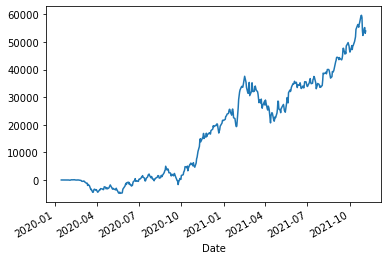

In [33]:
basket3['profit_loss'].plot()

In [34]:
# Final returns
total_invested = round(basket3['invest_price'][-1],2)
net_profit_loss = round(basket3['profit_loss'][-1],2)
units_bought = basket3['invest_units'][-1]
max_mtm = round(basket3['profit_loss'].max(),2)
min_mtm = round(basket3['profit_loss'].min(),2)
avg_mnth_invest = round(basket3.groupby('month_yr')['buy_price'].sum().mean(),2)
abs_returns = round(net_profit_loss/total_invested,2)*100

print(f"Total units invested - {units_bought} units")
print(f"Total amount invested - Rs.{total_invested}")
print(f"Avg monthly investment - Rs.{avg_mnth_invest}")
print(f"Net absolute returns - {abs_returns}%")
print(f"Range of Basket P/L - Rs.{min_mtm} - Rs.{max_mtm}")

Total units invested - 294 units
Total amount invested - Rs.119901.87
Avg monthly investment - Rs.5213.12
Net absolute returns - 45.0%
Range of Basket P/L - Rs.-4826.64 - Rs.59655.97


In [35]:
strat = f'Buy_rs{week_amount}_weekly'
metrics = ['units_invested','total_amount','avg_month_invest','abs_returns','min_pl','max_pl']
values = [units_bought,total_invested,avg_mnth_invest,abs_returns,min_mtm,max_mtm]
basket_strat[strat] = dict(zip(metrics,values))

### Strategy 4 - Invest constant amount every month

In [36]:
basket4 = basket.copy()
month_amount = 5000.0

In [37]:
basket4['buy'] = np.where(basket4['month'].shift(1).bfill() != basket4['month'],1,0)
basket4.head()

,price,volume,month,week_no,weekday,year,month_yr,buy
Date,,,,,,,,
2020-01-15,455.809982,408734,1,3,3,2020,1_2020,0
2020-01-16,456.070007,363901,1,3,4,2020,1_2020,0
2020-01-17,454.100006,557803,1,3,5,2020,1_2020,0
2020-01-20,447.779999,940470,1,4,1,2020,1_2020,0
2020-01-21,445.690018,544253,1,4,2,2020,1_2020,0


In [38]:
basket4['units'] = basket4['price'].apply(lambda x: math.floor(month_amount/x))
basket4['buy_units'] = basket4['buy'] * basket4['units']
basket4['buy_price'] = (basket4['buy_units'] * basket4['price']).round(2)

basket4.head()

,price,volume,month,week_no,weekday,year,month_yr,buy,units,buy_units,buy_price
Date,,,,,,,,,,,
2020-01-15,455.809982,408734,1,3,3,2020,1_2020,0,10,0,0.0
2020-01-16,456.070007,363901,1,3,4,2020,1_2020,0,10,0,0.0
2020-01-17,454.100006,557803,1,3,5,2020,1_2020,0,11,0,0.0
2020-01-20,447.779999,940470,1,4,1,2020,1_2020,0,11,0,0.0
2020-01-21,445.690018,544253,1,4,2,2020,1_2020,0,11,0,0.0


In [39]:
basket4['invest_units'] = basket4['buy_units'].cumsum()
basket4['invest_price'] = basket4['buy_price'].cumsum()
basket4['MTM'] = basket4['invest_units'] * basket4['price']
basket4['profit_loss'] = basket4['MTM'] - basket4['invest_price']
basket4.tail()

,price,volume,month,week_no,weekday,year,month_yr,buy,units,buy_units,buy_price,invest_units,invest_price,MTM,profit_loss
Date,,,,,,,,,,,,,,,
2021-10-29,585.779999,4113067,10,43,5,2021,10_2021,0,8,0,0.00,246,100468.57,144101.879700,43633.309700
2021-11-01,594.820007,2230170,11,44,1,2021,11_2021,1,8,8,4758.56,254,105227.13,151084.281860,45857.151860
2021-11-02,595.600006,1514556,11,44,2,2021,11_2021,0,8,0,0.00,254,105227.13,151282.401550,46055.271550
2021-11-03,588.530014,1903020,11,44,3,2021,11_2021,0,8,0,0.00,254,105227.13,149486.623566,44259.493566
2021-11-04,591.279999,759731,11,44,4,2021,11_2021,0,8,0,0.00,254,105227.13,150185.119690,44957.989690


<AxesSubplot:xlabel='Date'>

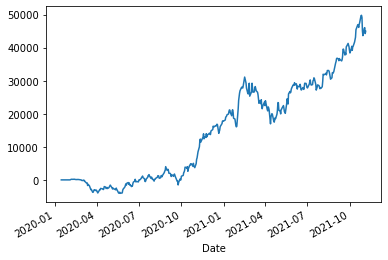

In [40]:
basket4['profit_loss'].plot()

In [41]:
# Final returns
total_invested = round(basket4['invest_price'][-1],2)
net_profit_loss = round(basket4['profit_loss'][-1],2)
units_bought = basket4['invest_units'][-1]
max_mtm = round(basket4['profit_loss'].max(),2)
min_mtm = round(basket4['profit_loss'].min(),2)
avg_mnth_invest = round(basket4.groupby('month_yr')['buy_price'].sum().mean(),2)
abs_returns = round(net_profit_loss/total_invested,2)*100

print(f"Total units invested - {units_bought} units")
print(f"Total amount invested - Rs.{total_invested}")
print(f"Avg monthly investment - Rs.{avg_mnth_invest}")
print(f"Net absolute returns - {abs_returns}%")
print(f"Range of Basket P/L - Rs.{min_mtm} - Rs.{max_mtm}")

Total units invested - 254 units
Total amount invested - Rs.105227.13
Avg monthly investment - Rs.4575.09
Net absolute returns - 43.0%
Range of Basket P/L - Rs.-4059.0 - Rs.49800.53


In [42]:
strat = f'Buy_rs{month_amount}_monthly'
metrics = ['units_invested','total_amount','avg_month_invest','abs_returns','min_pl','max_pl']
values = [units_bought,total_invested,avg_mnth_invest,abs_returns,min_mtm,max_mtm]
basket_strat[strat] = dict(zip(metrics,values))

### Strategy 5 - Double the amount during dips weekly

In [64]:
basket5 = basket.copy()
basket5.reset_index(inplace=True)

In [65]:
dip_quantile = 0.5
n_rows = 31
week_amount = 1500.0
multiplier = 3

To classify the price is low,say the set quantile value is 25%, then the 25% quantile is calculated at every day since first day of the analysis. If the price is trading lower than the set quantile value, then the index is considered as low, and double up the investment amount. If it is higher than set quantile value, then it invests fixed amount.

In [66]:
for r in range(n_rows,len(basket5)):
    price_val = basket5.loc[r,'price']
    dip_value = basket5.iloc[:r,:]['price'].quantile(dip_quantile)
    if price_val < dip_value:
        dips = 1
    else:
        dips = 0
        
    basket5.loc[r,'dips'] = dips

In [67]:
basket5.fillna(0,inplace=True)
basket5.set_index('Date',inplace=True)
basket5.groupby('dips')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
dips,,,,,,,,
0.0,377.0,461.493688,80.579457,312.289993,374.260002,478.810013,522.570007,610.850006
1.0,72.0,310.860278,39.715907,258.299995,287.955004,297.345001,323.307505,418.669991


In [68]:
basket5['buy'] = np.where(basket5['week_no'].shift(1).bfill() != basket5['week_no'],1,0)
basket5.head()

,price,volume,month,week_no,weekday,year,month_yr,dips,buy
Date,,,,,,,,,
2020-01-15,455.809982,408734,1,3,3,2020,1_2020,0.0,0
2020-01-16,456.070007,363901,1,3,4,2020,1_2020,0.0,0
2020-01-17,454.100006,557803,1,3,5,2020,1_2020,0.0,0
2020-01-20,447.779999,940470,1,4,1,2020,1_2020,0.0,1
2020-01-21,445.690018,544253,1,4,2,2020,1_2020,0.0,0


In [69]:
basket5['units'] = basket5['price'].apply(lambda x: math.floor(week_amount/x))
basket5['buy_units'] = basket5['buy'] * basket5['units']
basket5['buy_units'] = np.where(basket5['dips'] == 1,basket5['buy_units']*multiplier,basket5['buy_units'])
basket5['buy_price'] = (basket5['buy_units'] * basket5['price']).round(2)

basket5.head()

,price,volume,month,week_no,weekday,year,month_yr,dips,buy,units,buy_units,buy_price
Date,,,,,,,,,,,,
2020-01-15,455.809982,408734,1,3,3,2020,1_2020,0.0,0,3,0,0.00
2020-01-16,456.070007,363901,1,3,4,2020,1_2020,0.0,0,3,0,0.00
2020-01-17,454.100006,557803,1,3,5,2020,1_2020,0.0,0,3,0,0.00
2020-01-20,447.779999,940470,1,4,1,2020,1_2020,0.0,1,3,3,1343.34
2020-01-21,445.690018,544253,1,4,2,2020,1_2020,0.0,0,3,0,0.00


In [70]:
basket5['invest_units'] = basket5['buy_units'].cumsum()
basket5['invest_price'] = basket5['buy_price'].cumsum()
basket5['MTM'] = basket5['invest_units'] * basket5['price']
basket5['profit_loss'] = basket5['MTM'] - basket5['invest_price']
basket5.tail()

,price,volume,month,week_no,weekday,year,month_yr,dips,buy,units,buy_units,buy_price,invest_units,invest_price,MTM,profit_loss
Date,,,,,,,,,,,,,,,,
2021-10-29,585.779999,4113067,10,43,5,2021,10_2021,0.0,0,2,0,0.00,432,161097.25,253056.959473,91959.709473
2021-11-01,594.820007,2230170,11,44,1,2021,11_2021,0.0,1,2,2,1189.64,434,162286.89,258151.883179,95864.993179
2021-11-02,595.600006,1514556,11,44,2,2021,11_2021,0.0,0,2,0,0.00,434,162286.89,258490.402649,96203.512649
2021-11-03,588.530014,1903020,11,44,3,2021,11_2021,0.0,0,2,0,0.00,434,162286.89,255422.026093,93135.136093
2021-11-04,591.279999,759731,11,44,4,2021,11_2021,0.0,0,2,0,0.00,434,162286.89,256615.519470,94328.629470


<AxesSubplot:xlabel='Date'>

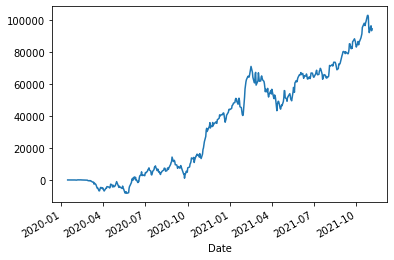

In [71]:
basket5['profit_loss'].plot()

In [72]:
# Final returns
total_invested = round(basket5['invest_price'][-1],2)
net_profit_loss = round(basket5['profit_loss'][-1],2)
units_bought = basket5['invest_units'][-1]
max_mtm = round(basket5['profit_loss'].max(),2)
min_mtm = round(basket5['profit_loss'].min(),2)
avg_mnth_invest = round(basket5.groupby('month_yr')['buy_price'].sum().mean(),2)
abs_returns = round(net_profit_loss/total_invested,2)*100

print(f"Total units invested - {units_bought} units")
print(f"Total amount invested - Rs.{total_invested}")
print(f"Avg monthly investment - Rs.{avg_mnth_invest}")
print(f"Net absolute returns - {abs_returns}%")
print(f"Range of Basket P/L - Rs.{min_mtm} - Rs.{max_mtm}")

Total units invested - 434 units
Total amount invested - Rs.162286.89
Avg monthly investment - Rs.7055.95
Net absolute returns - 57.99999999999999%
Range of Basket P/L - Rs.-8323.62 - Rs.102789.95


In [73]:
strat = 'double_dips_weekly'
metrics = ['units_invested','total_amount','avg_month_invest','abs_returns','min_pl','max_pl']
values = [units_bought,total_invested,avg_mnth_invest,abs_returns,min_mtm,max_mtm]
basket_strat[strat] = dict(zip(metrics,values))

### Strategy 6 - Double the amount during dips weekly

In [74]:
basket6 = basket.copy()
basket6.reset_index(inplace=True)

In [75]:
dip_quantile = 0.5
n_rows = 31
amount = 5000.0
multiplier = 3.0

To classify the price is low,say the set quantile value is 25%, then the 25% quantile is calculated at every day since first day of the analysis. If the price is trading lower than the set quantile value, then the index is considered as low, and double up the investment amount. If it is higher than set quantile value, then it invests fixed amount.

In [76]:
for r in range(n_rows,len(basket6)):
    price_val = basket6.loc[r,'price']
    dip_value = basket6.iloc[:r,:]['price'].quantile(dip_quantile)
    if price_val < dip_value:
        dips = 1
    else:
        dips = 0
        
    basket6.loc[r,'dips'] = dips

In [77]:
basket6.fillna(0,inplace=True)
basket6.set_index('Date',inplace=True)
basket6.groupby('dips')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
dips,,,,,,,,
0.0,377.0,461.493688,80.579457,312.289993,374.260002,478.810013,522.570007,610.850006
1.0,72.0,310.860278,39.715907,258.299995,287.955004,297.345001,323.307505,418.669991


In [78]:
basket6['buy'] = np.where(basket6['month'].shift(1).bfill() != basket6['month'],1,0)
basket6.head()

,price,volume,month,week_no,weekday,year,month_yr,dips,buy
Date,,,,,,,,,
2020-01-15,455.809982,408734,1,3,3,2020,1_2020,0.0,0
2020-01-16,456.070007,363901,1,3,4,2020,1_2020,0.0,0
2020-01-17,454.100006,557803,1,3,5,2020,1_2020,0.0,0
2020-01-20,447.779999,940470,1,4,1,2020,1_2020,0.0,0
2020-01-21,445.690018,544253,1,4,2,2020,1_2020,0.0,0


In [79]:
basket6['units'] = basket6['price'].apply(lambda x: math.floor(amount/x))
basket6['buy_units'] = basket6['buy'] * basket6['units']
basket6['buy_units'] = np.where(basket6['dips'] == 1,basket6['buy_units']*multiplier,basket6['buy_units'])
basket6['buy_price'] = (basket6['buy_units'] * basket6['price']).round(2)

basket6.head()

,price,volume,month,week_no,weekday,year,month_yr,dips,buy,units,buy_units,buy_price
Date,,,,,,,,,,,,
2020-01-15,455.809982,408734,1,3,3,2020,1_2020,0.0,0,10,0.0,0.0
2020-01-16,456.070007,363901,1,3,4,2020,1_2020,0.0,0,10,0.0,0.0
2020-01-17,454.100006,557803,1,3,5,2020,1_2020,0.0,0,11,0.0,0.0
2020-01-20,447.779999,940470,1,4,1,2020,1_2020,0.0,0,11,0.0,0.0
2020-01-21,445.690018,544253,1,4,2,2020,1_2020,0.0,0,11,0.0,0.0


In [80]:
basket6['invest_units'] = basket6['buy_units'].cumsum()
basket6['invest_price'] = basket6['buy_price'].cumsum()
basket6['MTM'] = basket6['invest_units'] * basket6['price']
basket6['profit_loss'] = basket6['MTM'] - basket6['invest_price']
basket6.tail()

,price,volume,month,week_no,weekday,year,month_yr,dips,buy,units,buy_units,buy_price,invest_units,invest_price,MTM,profit_loss
Date,,,,,,,,,,,,,,,,
2021-10-29,585.779999,4113067,10,43,5,2021,10_2021,0.0,0,8,0.0,0.00,370.0,139620.45,216738.599548,77118.149548
2021-11-01,594.820007,2230170,11,44,1,2021,11_2021,0.0,1,8,8.0,4758.56,378.0,144379.01,224841.962769,80462.952769
2021-11-02,595.600006,1514556,11,44,2,2021,11_2021,0.0,0,8,0.0,0.00,378.0,144379.01,225136.802307,80757.792307
2021-11-03,588.530014,1903020,11,44,3,2021,11_2021,0.0,0,8,0.0,0.00,378.0,144379.01,222464.345306,78085.335306
2021-11-04,591.279999,759731,11,44,4,2021,11_2021,0.0,0,8,0.0,0.00,378.0,144379.01,223503.839539,79124.829539


<AxesSubplot:xlabel='Date'>

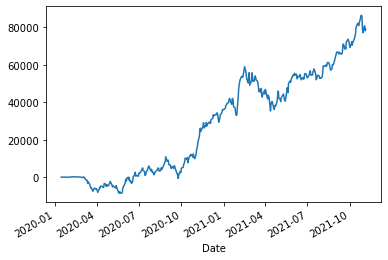

In [81]:
basket6['profit_loss'].plot()

In [82]:
# Final returns
total_invested = round(basket6['invest_price'][-1],2)
net_profit_loss = round(basket6['profit_loss'][-1],2)
units_bought = basket6['invest_units'][-1]
max_mtm = round(basket6['profit_loss'].max(),2)
min_mtm = round(basket6['profit_loss'].min(),2)
avg_mnth_invest = round(basket6.groupby('month_yr')['buy_price'].sum().mean(),2)
abs_returns = round(net_profit_loss/total_invested,2)*100

print(f"Total units invested - {units_bought} units")
print(f"Total amount invested - Rs.{total_invested}")
print(f"Avg monthly investment - Rs.{avg_mnth_invest}")
print(f"Net absolute returns - {abs_returns}%")
print(f"Range of Basket P/L - Rs.{min_mtm} - Rs.{max_mtm}")

Total units invested - 378.0 units
Total amount invested - Rs.144379.01
Avg monthly investment - Rs.6277.35
Net absolute returns - 55.00000000000001%
Range of Basket P/L - Rs.-8624.44 - Rs.86394.05


In [83]:
strat = 'double_dips_monthly'
metrics = ['units_invested','total_amount','avg_month_invest','abs_returns','min_pl','max_pl']
values = [units_bought,total_invested,avg_mnth_invest,abs_returns,min_mtm,max_mtm]
basket_strat[strat] = dict(zip(metrics,values))

In [84]:
pd.DataFrame(basket_strat)

,Buy_2units_weekly,Buy_10units_monthly,Buy_rs1500.0_weekly,Buy_rs5000.0_monthly,double_dips_weekly,double_dips_monthly
units_invested,188.00,220.00,294.00,254.00,434.00,378.00
total_amount,81881.48,96252.50,119901.87,105227.13,162286.89,144379.01
avg_month_invest,3560.06,4184.89,5213.12,4575.09,7055.95,6277.35
abs_returns,36.00,35.00,45.00,43.00,58.00,55.00
min_pl,-3011.62,-3390.80,-4826.64,-4059.00,-8323.62,-8624.44
max_pl,32926.26,37974.20,59655.97,49800.53,102789.95,86394.05


### THE END